# Predicting Iris Species

## 1. Business understanding

The identification of biodiversity is critical for organizations engaged with the conservation of biodiversity. Although the identification of large animals may be easy, smaller organisms require expert skills for correct identification. The inability to identify species is known as a **taxonomic impediment** or taxonomic problem.

This notebook proposes a data mining solution to address taxonomic impediment problems.

[Presentation slides](https://docs.google.com/presentation/d/1St9pn2o1xR4_S9GS4uoGl9S4r0JCo8nPppBFBWdf3DA/edit?usp=sharing)

## 2. Setup

### Coding constants

In [1]:
GRAPH_WIDTH = 6
GRAPH_HEIGHT = 5

### Common imports

In [2]:
%matplotlib inline 

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

## Load the data

In [3]:
df = pd.read_csv('data/iris-species.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

## 3. Data understanding

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Attributes variables distribution

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

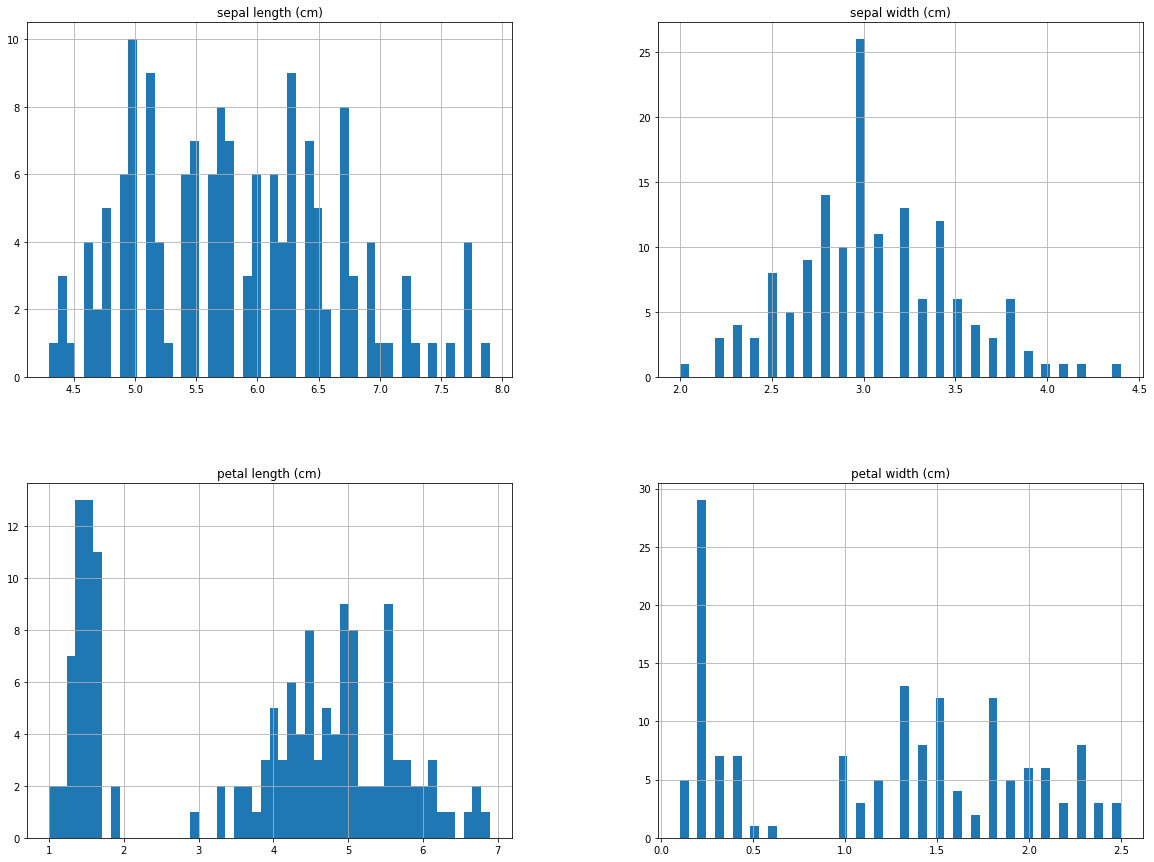

In [7]:
df.hist(bins=50, figsize=(20,15))

**Observations**

- There is some variation in the attributes ranges. For example, petal width ranges from around 0.5 to around 2.5, while sepal length ranges from around 4.5 to around 8.0.
- These variations suggest normalizing all the attributes to facilitate the task of finding optimal weights by a linear classifier.  

### Target variable distribution

<AxesSubplot:>

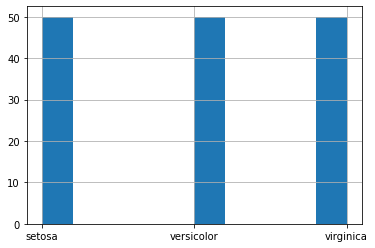

In [8]:
df['species'].hist()

**Observations**

The plot shows all classes are equally balanced (no class imbalance issues)

### Visualizing relationships between the target variable and attributes 

**Function for continuous attributes:**

In [9]:
def plot_class_attribute_dist(df, class_var, attribute):
    df.groupby(class_var)[attribute].plot.hist(
        alpha=0.4, figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
    plt.suptitle(attribute)
    plt.legend()

#### Petal length versus species

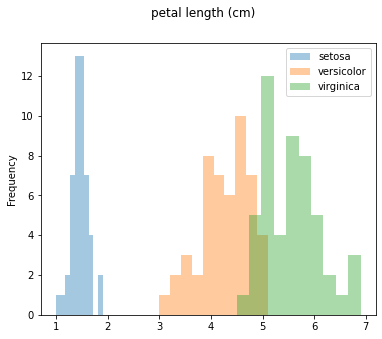

In [11]:
plot_class_attribute_dist(df, 'species', 'petal length (cm)')

**Observations**

The plot shows:
- Setosa exhibits shorter petals in length
- The petal length of Versicolor is medium-sized relatively
- Virginica petals exhibit the largest in length

Thus, the data suggest petal length is an indicator of Iris species.

#### Petal width length versus species

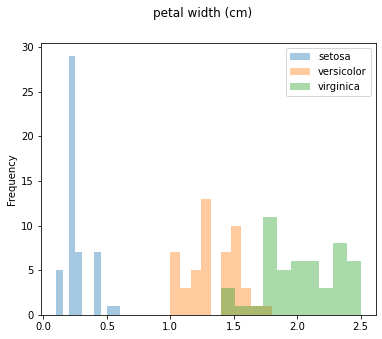

In [13]:
plot_class_attribute_dist(df, 'species', 'petal width (cm)')

**Observations**

Similar to petal length, the data suggests petal width is an indicator of Iris species.

Altogether, Setosa flowers have smaller petals, Versicolor flowers have medium-sized petals, and Virginica exhibits the largest petals.

#### Sepal length versus species

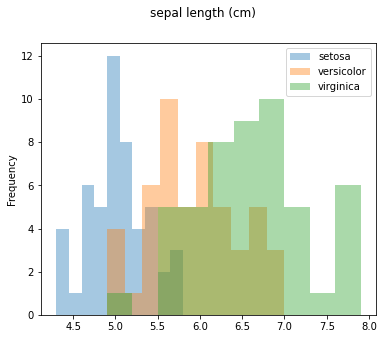

In [14]:
plot_class_attribute_dist(df, 'species', 'sepal length (cm)')

**Observations**

Setosa exhibits relatively shorter sepals, while Virginica sepals are somewhat longer. However, Versicolor sepals are harder to distinguish as the sepal of many Versicolor flowers display the same length as Setosa and Virginica.

#### Sepal width versus species

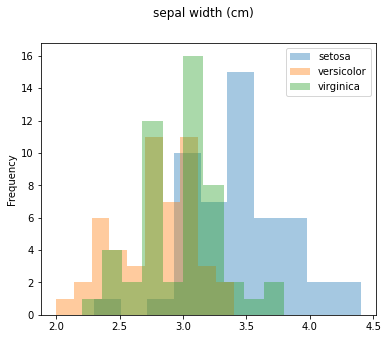

In [15]:
plot_class_attribute_dist(df, 'species', 'sepal width (cm)')

**Observations**

Observations are similar to sepal length.

## 4. Data Processing

The data has been preprocessed already, so there is nothing to do here.

## 5. Data Modeling

In [16]:
training_set, test_set = train_test_split(df, test_size=0.1, random_state=15)

print(training_set.shape)
print(test_set.shape)

(135, 5)
(15, 5)


In [17]:
training_attr = training_set.loc[:, training_set.columns != 'species']
training_labels = training_set['species']

In [18]:
test_attr = test_set.loc[:, test_set.columns != 'species']
test_labels = test_set['species']

In [19]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Decision tree with depth = 5

In [20]:
tree_depth_5_clf = DecisionTreeClassifier(max_depth = 5)

In [21]:
scores = cross_val_score(tree_depth_5_clf, training_attr, training_labels, scoring='accuracy', cv=10)
display_scores(scores)

Scores: [0.92857143 0.92857143 0.92857143 0.92857143 1.         0.92307692
 0.84615385 0.92307692 1.         0.84615385]
Mean: 0.9252747252747253
Standard deviation: 0.04872483357669311


## Logistic regression

In [22]:
logistic_regr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic_regression", LogisticRegression()),
])

In [23]:
scores = cross_val_score(logistic_regr_clf, training_attr, training_labels, scoring='accuracy', cv=10)
display_scores(scores)

Scores: [1.         1.         1.         0.92857143 1.         0.92307692
 0.92307692 0.84615385 1.         0.84615385]
Mean: 0.9467032967032967
Standard deviation: 0.05989010989010989


## Linear support vector machine

In [24]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC()), # SVC stands for support vector classifier
])

In [25]:
scores = cross_val_score(svm_clf, training_attr, training_labels, scoring='accuracy', cv=10)
display_scores(scores)

Scores: [1.         1.         1.         1.         1.         0.92307692
 0.92307692 0.69230769 1.         0.69230769]
Mean: 0.923076923076923
Standard deviation: 0.1191687183448436


### Assessing feature importance

In [26]:
tree_depth_5_clf = DecisionTreeClassifier(max_depth = 5)
tree_depth_5_clf.fit(training_attr, training_labels)

DecisionTreeClassifier(max_depth=5)

In [27]:
feature_importances = pd.Series(
    tree_depth_5_clf.feature_importances_,
    index=training_attr.columns)

feature_importances.sort_values(inplace=True, ascending=False)
for feature in enumerate(feature_importances.index):
    print(f"{(feature[0]+1):02d}) {feature[1]:<30} {feature_importances[feature[0]]:.4f}")

01) petal width (cm)               0.9157
02) petal length (cm)              0.0732
03) sepal width (cm)               0.0111
04) sepal length (cm)              0.0000


<AxesSubplot:>

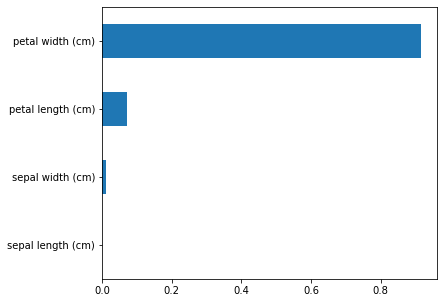

In [28]:
plt.figure(figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
feature_importances.sort_values(ascending=True).plot.barh()

## 6. Evaluation

In [29]:
def evaluate_performance(model, training, labels):
    labels_pred = model.predict(training)
    n_correct = sum(labels_pred == labels)   
    performance = n_correct / len(labels_pred)
  
    return performance

In [30]:
logistic_regr_clf.fit(training_attr, training_labels)
performance = evaluate_performance(logistic_regr_clf, test_attr, test_labels)

f"Performance of final model - logistic regression classifier: {performance * 100:.2f}%"

'Performance of final model - logistic regression classifier: 100.00%'